In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
# plt.style.use('dark_background')
sb.set_theme(style="darkgrid", color_codes=True)

In [50]:
import pyspark as ps

In [14]:
beers_df = pd.read_csv('../data/beers.csv')

In [15]:
beers_df.isna().sum()
# beers_df = beers_df.dropna()

id                  0
name                0
brewery_id          0
state           60726
country           154
style               1
availability        0
abv             38797
notes              46
retired             0
dtype: int64

In [5]:
beers_df.describe()

,id,brewery_id,abv
count,263521.000000,263521.000000,263521.000000
mean,202286.498583,26444.944866,6.608096
std,103973.680670,16025.572902,2.064487
min,5.000000,3.000000,0.010000
25%,114826.000000,13338.000000,5.200000
50%,207705.000000,30232.000000,6.100000
75%,292281.000000,38638.000000,7.600000
max,374406.000000,54144.000000,100.000000


In [7]:
us_beer = beers_df[beers_df.country=='US']
us_beer

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f
6,108605,Icon Sender,22598,CA,US,American Lager,Year-round,5.6,No notes at this time.,f
...,...,...,...,...,...,...,...,...,...,...
358865,258269,Brewers Select #019 High Pressure Lager,28281,WA,US,American Lager,Rotating,4.5,No notes at this time.,f
358867,146613,American Pale Ale,36926,WI,US,American Pale Ale (APA),Rotating,NaN,No notes at this time.,t
358870,187618,RIPTA,34665,RI,US,Belgian Tripel,Rotating,9.5,No notes at this time.,f
358871,283124,Rumble Fish,29238,MI,US,American Imperial IPA,Rotating,8.3,No notes at this time.,f


In [149]:
us_beer = us_beer[us_beer.retired=='f']

In [13]:
us_beer['style'].unique()

array(['English Oatmeal Stout', 'Scottish Ale', 'American Imperial Stout',
       'American Cream Ale', 'American Lager', 'English Bitter',
       'Belgian Witbier', 'American Pale Wheat Ale', 'Berliner Weisse',
       'American Pale Ale (APA)', 'American Black Ale', 'Baltic Porter',
       'American Porter', 'Fruit and Field Beer', 'American Imperial IPA',
       'American Wild Ale', 'Irish Red Ale', 'American Amber / Red Lager',
       'Belgian Saison', 'American IPA', 'Rye Beer',
       'Belgian Quadrupel (Quad)', 'German Hefeweizen', 'American Stout',
       'American Amber / Red Ale', 'German Bock', 'Pumpkin Beer',
       'German Maibock', 'German Dunkelweizen', 'Smoke Beer',
       'Russian Imperial Stout', 'Vienna Lager',
       'English Extra Special / Strong Bitter (ESB)',
       'English Sweet / Milk Stout', 'Scotch Ale / Wee Heavy',
       'Leipzig Gose', 'German Pilsner', 'German Kristalweizen',
       'German Märzen / Oktoberfest', 'American Brown Ale',
       'American Bl

In [150]:
top_styles = us_beer['style'].value_counts().head(10)
top_styles

American IPA                26826
American Pale Ale (APA)     11545
American Imperial IPA       11479
Belgian Saison               8778
American Wild Ale            6125
American Porter              5602
American Imperial Stout      5580
American Stout               5108
American Amber / Red Ale     5046
American Brown Ale           4074
Name: style, dtype: int64

In [47]:
top_styles_world = beers_df['style'].value_counts().head(10)

Text(0.5, 1.0, 'Top Beer Styles Worldwide')

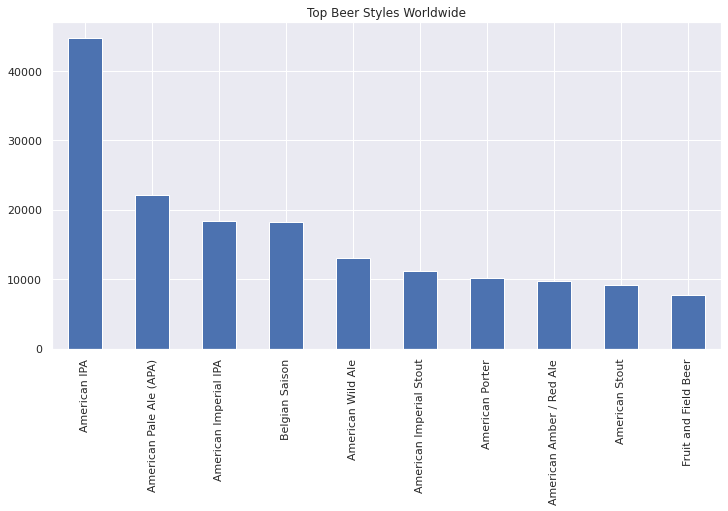

In [48]:
plt = top_styles_world.plot(kind='bar',figsize=(12,6))
plt.set_title('Top Beer Styles Worldwide')

In [ ]:
plt = top_styles_world

Text(0.5, 1.0, 'Top US Beer Styles')

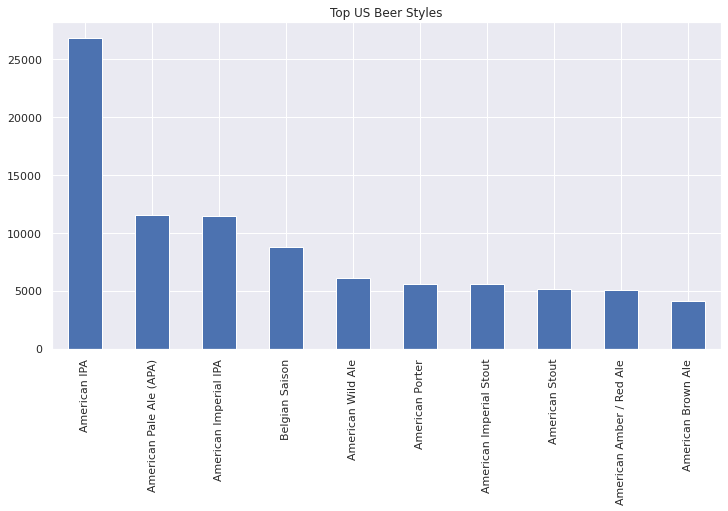

In [151]:
plt = top_styles.plot(kind='bar',figsize=(12,6))
plt.set_title('Top US Beer Styles')


In [152]:
top_breweries = us_beer.brewery_id.value_counts().head(10)
top_breweries

1550     493
28383    481
6045     431
1337     346
33510    336
9629     328
44994    300
41018    299
37910    294
31722    267
Name: brewery_id, dtype: int64

In [131]:
top_breweries.index

Int64Index([1550, 28383, 17981, 1146, 6045, 147, 16866, 1337, 140, 34748], dtype='int64')

In [153]:
top_breweries = pd.merge(top_breweries,us_breweries,left_on=top_breweries.index,right_on='brewery_id').drop('brewery_id_y',axis=1)

In [154]:
top_breweries

,brewery_id,brewery_id_x,name,city,state,country,notes,types
0,1550,493,Rock Bottom Restaurant & Brewery,NaN,NaN,US,No notes at this time.,Brewery
1,28383,481,Tired Hands Brewing Company,Ardmore,PA,US,No notes at this time.,"Brewery, Bar, Eatery, Beer-to-go"
2,6045,431,Iron Hill Brewery & Restaurant,NaN,NaN,US,No notes at this time.,Brewery
3,1337,346,Pizza Port Solana Beach,Solana Beach,CA,US,The original location opened in March 1987 by ...,"Brewery, Bar, Eatery, Beer-to-go"
4,33510,336,Other Half Brewing Co.,Brooklyn,NY,US,Tasting room hours:,"Brewery, Bar, Beer-to-go"
5,9629,328,Short's Brewing Company,Bellaire,MI,US,19.99% owned by Lagunitas/Heineken,"Brewery, Bar, Eatery, Beer-to-go"
6,44994,300,Boiler Brewing Co.,Lincoln,NE,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
7,41018,299,The Veil Brewing Co.,Richmond,VA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
8,37910,294,The Answer Brewpub,Richmond,VA,US,The entrance to this brewpub is in the rear of...,"Brewery, Bar, Eatery, Beer-to-go"
9,31722,267,Burial Beer Co.,Asheville,NC,US,MON: 4-10pm,"Brewery, Bar, Eatery, Beer-to-go"


Text(0.5, 1.0, 'Top US Breweries by # Rated Beers')

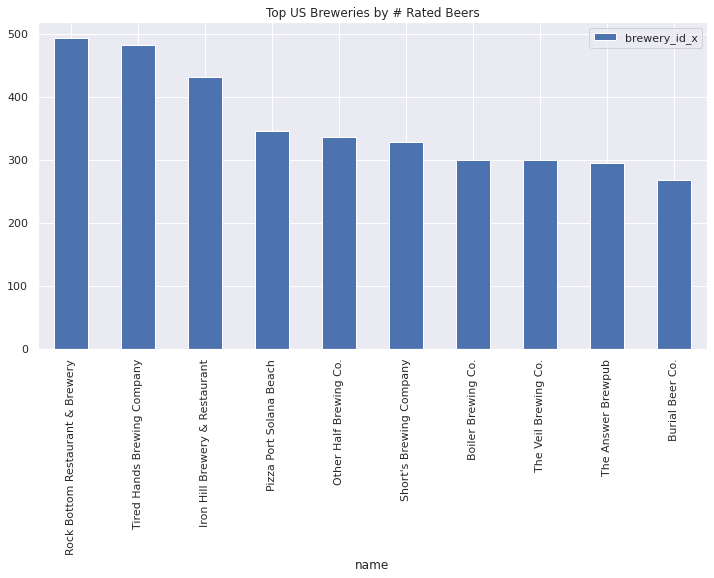

In [155]:
plt = top_breweries.plot(kind='bar',x='name',y = 'brewery_id_x',figsize=(12,6))
plt.set_title('Top US Breweries by # Rated Beers')

In [146]:
us_beer[us_beer.brewery_id==1550]

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
68,57062,Oxidizer,1550,NaN,US,American Imperial IPA,Rotating,NaN,No notes at this time.,f
163,65001,Nog,1550,NaN,US,American Amber / Red Ale,Winter,5.4,No notes at this time.,f
229,65106,Gorgeous George,1550,NaN,US,English India Pale Ale (IPA),Limited (brewed once),6.7,No notes at this time.,t
319,46693,Bourbon Aged Barleywine,1550,NaN,US,American Barleywine,Rotating,12.0,No notes at this time.,f
1190,365521,Fools Gold,1550,NaN,US,Belgian Pale Ale,Rotating,6.0,No notes at this time.,f
...,...,...,...,...,...,...,...,...,...,...
357412,140959,Belgian White Ale,1550,NaN,US,Belgian Witbier,Rotating,5.3,No notes at this time.,f
357562,147913,City Nights,1550,NaN,US,American Porter,Limited (brewed once),6.0,No notes at this time.,t
357754,199322,Prole Porter,1550,NaN,US,American Porter,Rotating,6.2,No notes at this time.,f
357783,152765,Hoppsan Pale Ale,1550,NaN,US,American Pale Ale (APA),Limited (brewed once),5.7,No notes at this time.,t


In [144]:
rock_bottom_beers = us_beer[us_beer.brewery_id==1550].name.unique()
rock_bottom_beers

array(['Oxidizer', 'Nog', 'Gorgeous George', ..., 'Prole Porter',
       'Hoppsan Pale Ale', 'Apricot Saison'], dtype=object)

In [145]:
len(rock_bottom_beers)

1227

In [138]:
breweries_df[breweries_df.name=='Rock Bottom Restaurant & Brewery']

,id,name,city,state,country,notes,types
1632,52975,Rock Bottom Restaurant & Brewery,Bolingbrook,IL,US,No notes at this time.,"Brewery, Bar, Eatery"
4373,1764,Rock Bottom Restaurant & Brewery,West Des Moines,IA,US,No notes at this time.,"Brewery, Bar, Eatery, Beer-to-go"
6799,1900,Rock Bottom Restaurant & Brewery,King Of Prussia,PA,US,No notes at this time.,"Brewery, Bar, Eatery"
8135,11329,Rock Bottom Restaurant & Brewery,Campbell,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
8466,2788,Rock Bottom Restaurant & Brewery,Denver,CO,US,No notes at this time.,"Brewery, Bar, Eatery"
9692,16861,Rock Bottom Restaurant & Brewery,Westminster,CO,US,No notes at this time.,"Brewery, Bar, Eatery, Beer-to-go"
13334,12049,Rock Bottom Restaurant & Brewery,Englewood,CO,US,No notes at this time.,"Brewery, Bar, Eatery, Beer-to-go"
15160,2981,Rock Bottom Restaurant & Brewery,Milwaukee,WI,US,No notes at this time.,"Brewery, Bar, Eatery, Beer-to-go"
15456,25371,Rock Bottom Restaurant & Brewery,Boston,MA,US,No notes at this time.,"Bar, Eatery"
15543,16,Rock Bottom Restaurant & Brewery,Boston,MA,US,No notes at this time.,"Brewery, Bar, Eatery, Beer-to-go"


In [8]:
breweries_df = pd.read_csv('../data/breweries.csv')
breweries_df

,id,name,city,state,country,notes,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store
4,35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,Duplicate of https://www.beeradvocate.com/beer...,"Bar, Eatery"
...,...,...,...,...,...,...,...
50342,1430,Blagodarnensky Brewery,Blagodarny,NaN,RU,No notes at this time.,Brewery
50343,23267,Eataly,Torino (TO),NaN,IT,"Big gourmet market, with a beer store and a be...","Bar, Eatery, Beer-to-go"
50344,32352,Frites - Quarry Bay,Hong Kong Island,NaN,HK,Located on the Ground Floor of Oxford House in...,"Bar, Eatery"
50345,20047,Forest City Wines & Spirits,Middletown,CT,US,No notes at this time.,Store


In [114]:
us_breweries = breweries_df[breweries_df.country=='US']
us_breweries = us_breweries.rename(columns={'id':'brewery_id'})
us_breweries

,brewery_id,name,city,state,country,notes,types
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store
5,31561,Teddy's Tavern,Seattle,WA,US,No notes at this time.,"Bar, Beer-to-go"
9,41278,The Other End,Destin,FL,US,No notes at this time.,"Bar, Eatery"
...,...,...,...,...,...,...,...
50338,3124,Abington Ale House & Grille,Abington,MA,US,No notes at this time.,"Bar, Eatery"
50339,30980,Zipline Brewing Co,Lincoln,NE,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
50341,24375,The Copper Kettle,Soldotna,AK,US,No notes at this time.,Homebrew
50345,20047,Forest City Wines & Spirits,Middletown,CT,US,No notes at this time.,Store


In [119]:
us_breweries[us_breweries.brewery_id.isin(list(top_breweries.keys()))].name

13598           Sierra Nevada Brewing Co.
14190      Iron Hill Brewery & Restaurant
24829                Imperial Oak Brewing
28093                  Cigar City Brewing
29183                          The Bruery
33443               Goose Island Beer Co.
34489             Pizza Port Solana Beach
38147    Rock Bottom Restaurant & Brewery
42535         Tired Hands Brewing Company
44068                       Stone Brewing
Name: name, dtype: object

In [96]:
us_breweries['name'].value_counts().head(10)

Whole Foods Market             162
Total Wine & More              147
Cost Plus World Market         118
Mellow Mushroom                114
Trader Joe's                    88
Old Chicago                     78
BJ's Restaurant & Brewhouse     68
World of Beer                   66
Yard House                      61
Wegmans                         58
Name: name, dtype: int64

In [10]:
breweries_df.isna().sum()

id             0
name           0
city          58
state      11271
country        6
notes         85
types          0
dtype: int64

In [11]:
breweries_df.country.unique()

array(['BE', 'US', 'GB', 'AU', 'IT', 'CA', 'GR', 'FR', 'AT', 'ES', 'RU',
       'SE', 'NL', 'UZ', 'CO', 'JP', 'PL', 'CZ', 'DE', 'PT', 'DK', 'TW',
       'AR', 'NZ', 'CH', 'BR', 'MX', 'VN', 'FI', 'EE', 'PR', 'UA', 'IM',
       'SM', 'CL', 'BZ', 'AL', 'SK', 'IE', 'CN', 'KY', 'PW', 'NO', 'RO',
       'MM', 'SG', 'LT', 'RS', 'BM', 'KH', 'LV', 'HK', 'CY', 'MD', 'IS',
       'PH', 'IN', 'PE', 'UY', 'TR', 'TH', 'IR', 'JM', 'EC', 'ZA', 'KR',
       'BG', 'IL', 'LI', 'HU', 'NG', 'CR', 'VI', 'PS', 'KP', 'MY', 'KG',
       'GT', 'CG', 'KE', 'MK', 'FO', 'AE', 'TD', 'WS', 'JE', 'LA', 'BB',
       'TO', 'MN', 'ER', 'DO', 'VU', 'MG', 'GE', 'VE', 'BY', 'SI', 'CK',
       'SV', 'MU', 'ID', 'BH', 'VC', 'SR', 'NE', 'MZ', 'LU', 'RW', 'UG',
       'MT', 'HR', 'GG', 'NC', 'ME', 'PA', 'PF', 'BA', 'TM', 'SN', 'DZ',
       'ET', 'AO', 'GH', 'NP', 'MA', 'BS', 'BT', 'OM', 'KZ', 'CW', 'CU',
       'AG', nan, 'BF', 'GF', 'AZ', 'HT', 'GL', 'LB', 'DM', 'HN', 'VG',
       'CI', 'GP', 'TC', 'NI', 'BO', 'AM', 'SX', 'GI

In [51]:
spark = ps.sql.SparkSession.builder \
            .master("local[*]") \
            .config("spark.driver.memory", "15g") \
            .appName("BeerBro") \
            .getOrCreate()

In [52]:
# import the many data types
from pyspark.sql.types import *
from pyspark.sql.functions import countDistinct


In [53]:
users_schema = StructType( [
    StructField('beer_id',IntegerType(),True),
    StructField('username',StringType(),True),
    StructField('date',DateType(),True),
    StructField('text',StringType(),True),
    StructField('look',FloatType(),True),
    StructField('smell',FloatType(),True),
    StructField('taste',FloatType(),True),
    StructField('feel',FloatType(),True),
    StructField('overall',FloatType(),True),
    StructField('score',FloatType(),True), ] )

ratings = spark.read.csv('../data/reviews.csv',
                            header=True,
                            schema=users_schema,
                            inferSchema=False)

In [54]:
ratings.show(5)

+-------+---------------+----------+--------------------+----+-----+-----+----+-------+-----+
|beer_id|       username|      date|                text|look|smell|taste|feel|overall|score|
+-------+---------------+----------+--------------------+----+-----+-----+----+-------+-----+
| 271781|   bluejacket74|2017-03-17|   750 ml bottle,...| 4.0|  4.0|  4.0|4.25|    4.0| 4.03|
| 125646|        _dirty_|2017-12-21|                    | 4.5|  4.5|  4.5| 4.5|    4.5|  4.5|
| 125646|        CJDUBYA|2017-12-21|                    |4.75| 4.75| 4.75|4.75|   4.75| 4.75|
| 125646|GratefulBeerGuy|2017-12-20|"   0% 16 oz can....|null| null| null|null|   null| null|
| 125646|       LukeGude|2017-12-20|   Classic TH NEI...|4.25|  4.5| 4.25|4.25|   4.25| 4.31|
+-------+---------------+----------+--------------------+----+-----+-----+----+-------+-----+
only showing top 5 rows



In [160]:
ratings.count()

9073128

In [161]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)
ratings

beer_id,username,date,text,look,smell,taste,feel,overall,score
271781,bluejacket74,2017-03-17,"750 ml bottle,...",4.0,4.0,4.0,4.25,4.0,4.03
125646,_dirty_,2017-12-21,,4.5,4.5,4.5,4.5,4.5,4.5
125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
125646,GratefulBeerGuy,2017-12-20,""" 0% 16 oz can....",null,null,null,null,null,null
125646,LukeGude,2017-12-20,Classic TH NEI...,4.25,4.5,4.25,4.25,4.25,4.31
125646,jneff33,2017-12-20,,4.5,4.75,5.0,5.0,5.0,4.91
125646,yummybeer,2017-12-19,,4.75,4.5,4.75,4.75,4.75,4.69
125646,MFMB,2017-12-16,Pours a creamy...,4.75,4.5,4.5,4.5,4.5,4.52
125646,wwoj,2017-12-16,,5.0,4.75,4.5,4.5,4.5,4.59
125646,Rubenjr,2017-12-14,,4.75,4.5,4.5,4.75,4.5,4.54


In [179]:
beers_df[beers_df.id==11757]

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
158793,11757,Breakfast Stout,1199,MI,US,American Imperial Stout,Rotating,8.3,Availability: Sep - Dec,f


In [182]:
pd.options.display.max_colwidth = 100

In [183]:
breweries_df[breweries_df.id==1199].notes

34812    Mahou San Miguel has a 30% ownership stake since 2014.
Name: notes, dtype: object

In [206]:
ratings.groupBy('beer_id').count().orderBy("count",ascending=False).limit(1000)

beer_id,count
11757,17160
2093,15947
7971,14927
1093,14915
29619,14292
16814,14282
17112,13448
19960,13331
10672,12706
412,12529


In [55]:
top_1000 = ratings.groupBy('beer_id').count().orderBy("count",ascending=False).limit(1000)

In [272]:
top_1000.show(10)

+-------+-----+
|beer_id|count|
+-------+-----+
|  11757|17160|
|   2093|15947|
|   7971|14927|
|   1093|14915|
|  29619|14292|
|  16814|14282|
|  17112|13448|
|  19960|13331|
|  10672|12706|
|    412|12529|
+-------+-----+
only showing top 10 rows



In [56]:
df = ratings.join(top_1000,on='beer_id',)
df.show(10)

+-------+---------------+----------+--------------------+----+-----+-----+----+-------+-----+-----+
|beer_id|       username|      date|                text|look|smell|taste|feel|overall|score|count|
+-------+---------------+----------+--------------------+----+-----+-----+----+-------+-----+-----+
| 125646|        _dirty_|2017-12-21|                    | 4.5|  4.5|  4.5| 4.5|    4.5|  4.5| 2664|
| 125646|        CJDUBYA|2017-12-21|                    |4.75| 4.75| 4.75|4.75|   4.75| 4.75| 2664|
| 125646|GratefulBeerGuy|2017-12-20|"   0% 16 oz can....|null| null| null|null|   null| null| 2664|
| 125646|       LukeGude|2017-12-20|   Classic TH NEI...|4.25|  4.5| 4.25|4.25|   4.25| 4.31| 2664|
| 125646|        jneff33|2017-12-20|                    | 4.5| 4.75|  5.0| 5.0|    5.0| 4.91| 2664|
| 125646|      yummybeer|2017-12-19|                    |4.75|  4.5| 4.75|4.75|   4.75| 4.69| 2664|
| 125646|           MFMB|2017-12-16|   Pours a creamy...|4.75|  4.5|  4.5| 4.5|    4.5| 4.52| 2664|


In [57]:
df.select(countDistinct('beer_id')).show()

+-----------------------+
|count(DISTINCT beer_id)|
+-----------------------+
|                   1000|
+-----------------------+



In [58]:
df = df.drop('date','overall')
df.show(10)

+-------+---------------+--------------------+----+-----+-----+----+-----+-----+
|beer_id|       username|                text|look|smell|taste|feel|score|count|
+-------+---------------+--------------------+----+-----+-----+----+-----+-----+
| 125646|        _dirty_|                    | 4.5|  4.5|  4.5| 4.5|  4.5| 2664|
| 125646|        CJDUBYA|                    |4.75| 4.75| 4.75|4.75| 4.75| 2664|
| 125646|GratefulBeerGuy|"   0% 16 oz can....|null| null| null|null| null| 2664|
| 125646|       LukeGude|   Classic TH NEI...|4.25|  4.5| 4.25|4.25| 4.31| 2664|
| 125646|        jneff33|                    | 4.5| 4.75|  5.0| 5.0| 4.91| 2664|
| 125646|      yummybeer|                    |4.75|  4.5| 4.75|4.75| 4.69| 2664|
| 125646|           MFMB|   Pours a creamy...|4.75|  4.5|  4.5| 4.5| 4.52| 2664|
| 125646|           wwoj|                    | 5.0| 4.75|  4.5| 4.5| 4.59| 2664|
| 125646|        Rubenjr|                    |4.75|  4.5|  4.5|4.75| 4.54| 2664|
| 125646|         jshusc|   

In [12]:
df.write.csv('../data/top_rated_plus.csv')

In [59]:
most_rated = df.toPandas()
most_rated

,beer_id,username,text,look,smell,taste,feel,score,count
0,125646,_dirty_,,4.50,4.50,4.50,4.50,4.50,2664
1,125646,CJDUBYA,,4.75,4.75,4.75,4.75,4.75,2664
2,125646,GratefulBeerGuy,""" 0% 16 oz can. Funny story: As I finally wa...",NaN,NaN,NaN,NaN,NaN,2664
3,125646,LukeGude,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.31,2664
4,125646,jneff33,,4.50,4.75,5.00,5.00,4.91,2664
...,...,...,...,...,...,...,...,...,...
3078483,125646,Dopadosio,,5.00,5.00,5.00,5.00,5.00,2664
3078484,125646,willp27,,5.00,5.00,5.00,4.50,4.95,2664
3078485,125646,yoshie,,4.75,4.75,4.50,4.75,4.60,2664
3078486,125646,Davewm24,,4.75,4.75,4.75,4.50,4.73,2664


In [60]:
most_rated.to_csv('../data/top_rated_plus.csv')

In [61]:
most_rated.describe()

,beer_id,look,smell,taste,feel,score,count
count,3.078488e+06,1.446500e+06,1.457450e+06,1.466456e+06,1.474059e+06,3.048539e+06,3.078488e+06
mean,3.055182e+04,4.070120e+00,4.012322e+00,4.057121e+00,3.995824e+00,4.009084e+00,4.596944e+03
std,3.675574e+04,6.491374e+00,6.201923e+00,3.953986e+00,2.934172e+00,1.319013e+00,3.296477e+03
min,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.373000e+03
25%,1.331000e+03,3.750000e+00,3.750000e+00,3.750000e+00,3.750000e+00,3.750000e+00,2.181000e+03
50%,1.588100e+04,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.060000e+00,3.379000e+03
75%,5.017600e+04,4.500000e+00,4.500000e+00,4.500000e+00,4.500000e+00,4.500000e+00,5.998000e+03
max,2.115160e+05,2.017000e+03,2.015000e+03,2.015000e+03,2.016000e+03,2.015000e+03,1.716000e+04


In [38]:
n_users = most_rated.username.unique().shape[0]
n_beers = most_rated.beer_id.unique().shape[0]
n_ratings = most_rated.score.shape[0]

In [41]:
n_ratings

3078488

In [43]:
print('Number of unique users: {}'.format(n_users))
print('Number of unique beers: {}'.format(n_beers))
print('Number of rating: {}'.format(n_ratings))

Number of unique users: 122712
Number of unique beers: 1000
Number of rating: 3078488


In [44]:
#density of the matrix:
print('The density is: {}'.format(n_ratings/(n_beers*n_users)))

The density is: 0.02508709824630028


In [62]:
most_rated.isna().sum()

beer_id           0
username       2057
text              0
look        1631988
smell       1621038
taste       1612032
feel        1604429
score         29949
count             0
dtype: int64

In [58]:
most_rated = most_rated.dropna()

In [63]:
most_rated_means = most_rated.groupby('beer_id').mean()
most_rated_means

,look,smell,taste,feel,score,count
beer_id,,,,,,
5,3.569071,3.314848,3.435774,3.401786,3.459699,1737
6,3.837863,3.575500,3.684463,3.587068,3.659804,2941
7,3.407776,3.328253,3.254259,3.264490,3.289541,3404
10,3.935979,5.871466,3.796924,3.783938,3.805655,1720
17,3.479105,3.211594,3.255258,3.344787,3.322062,2149
...,...,...,...,...,...,...
187317,3.745092,3.618064,3.698520,3.706631,3.681254,1610
189272,4.534134,4.448494,4.485783,4.485113,4.477996,1883
197183,3.862383,3.868740,3.826301,3.780224,3.833175,1840


In [79]:
text_reviews = most_rated[~(most_rated.text=='\xa0\xa0')]
len(text_reviews.beer_id.unique())

1000

In [82]:
text_reviews = text_reviews.groupby('beer_id').text.apply(lambda x: ','.join(x)).reset_index()

In [84]:
df = text_reviews.merge(most_rated_means, on='beer_id')
df

,beer_id,text,look,smell,taste,feel,score,count
0,5,"Beautiful beer. Light and tasty., I trave...",3.569071,3.314848,3.435774,3.401786,3.459699,1737
1,6,"great brown ale...one of my favorites., M...",3.837863,3.575500,3.684463,3.587068,3.659804,2941
2,7,The labeling with the purple haze guy with ...,3.407776,3.328253,3.254259,3.264490,3.289541,3404
3,10,Pours slightly hazy deep amber/brown. 1 fin...,3.935979,5.871466,3.796924,3.783938,3.805655,1720
4,17,"0%, Not much like a hefe, too citrusy (or...",3.479105,3.211594,3.255258,3.344787,3.322062,2149
...,...,...,...,...,...,...,...,...
995,187317,I think a one is to high of a rating. I per...,3.745092,3.618064,3.698520,3.706631,3.681254,1610
996,189272,"Love this beer., 19.2 oz can , 10/30/17, ...",4.534134,4.448494,4.485783,4.485113,4.477996,1883
997,197183,Clear Amber pour with modest head. Aromas o...,3.862383,3.868740,3.826301,3.780224,3.833175,1840
998,202078,""" Bought beer, poured a glass, it looked too...",4.295023,4.355418,4.342755,4.280097,4.331283,1558


In [90]:
df = df.merge(beers_df, how = 'left',left_on='beer_id', right_on='id')
df

,beer_id,text,look,smell,taste,feel,score,count,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,5,"Beautiful beer. Light and tasty., I trave...",3.569071,3.314848,3.435774,3.401786,3.459699,1737,5,Amber,3,LA,US,Vienna Lager,Year-round,4.5,Amber is a Munich style lager brewed with crys...,f
1,6,"great brown ale...one of my favorites., M...",3.837863,3.575500,3.684463,3.587068,3.659804,2941,6,Turbodog,3,LA,US,English Brown Ale,Year-round,5.6,Turbodog is a dark brown ale brewed with Willa...,f
2,7,The labeling with the purple haze guy with ...,3.407776,3.328253,3.254259,3.264490,3.289541,3404,7,Purple Haze,3,LA,US,Fruit and Field Beer,Year-round,4.2,Experience the magic of Purple Haze.® Clouds o...,f
3,10,Pours slightly hazy deep amber/brown. 1 fin...,3.935979,5.871466,3.796924,3.783938,3.805655,1720,10,Dubbel Ale,4,ME,US,Belgian Dubbel,Year-round,7.0,Allagash Dubbel boasts a deep red color and a ...,f
4,17,"0%, Not much like a hefe, too citrusy (or...",3.479105,3.211594,3.255258,3.344787,3.322062,2149,17,Widmer Hefeweizen,8,OR,US,German Hefeweizen,Year-round,4.9,availability: year-round,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,187317,I think a one is to high of a rating. I per...,3.745092,3.618064,3.698520,3.706631,3.681254,1610,187317,Otra Vez,140,CA,US,Leipzig Gose,Year-round,4.5,"In California, where temperatures often top tr...",t
996,189272,"Love this beer., 19.2 oz can , 10/30/17, ...",4.534134,4.448494,4.485783,4.485113,4.477996,1883,189272,Ten FIDY - Bourbon Barrel Aged,2681,CO,US,Russian Imperial Stout,Rotating,12.9,Aged through four seasons and from a blend of ...,f
997,197183,Clear Amber pour with modest head. Aromas o...,3.862383,3.868740,3.826301,3.780224,3.833175,1840,197183,Citradelic Tangerine IPA,192,CO,US,American IPA,Year-round,6.0,"Tangerine IPA brewed with Citra hops, orange p...",f
998,202078,""" Bought beer, poured a glass, it looked too...",4.295023,4.355418,4.342755,4.280097,4.331283,1558,202078,Enjoy By Unfiltered IPA,147,CA,US,American Imperial IPA,Rotating,9.4,In most cases skipping a step is a bad thing. ...,f


In [91]:
df.drop('retired',axis=1,inplace=True)
df.drop('availability',axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)
df.drop('count',axis=1,inplace=True)
df

,beer_id,text,look,smell,taste,feel,score,name,brewery_id,state,country,style,abv,notes
0,5,"Beautiful beer. Light and tasty., I trave...",3.569071,3.314848,3.435774,3.401786,3.459699,Amber,3,LA,US,Vienna Lager,4.5,Amber is a Munich style lager brewed with crys...
1,6,"great brown ale...one of my favorites., M...",3.837863,3.575500,3.684463,3.587068,3.659804,Turbodog,3,LA,US,English Brown Ale,5.6,Turbodog is a dark brown ale brewed with Willa...
2,7,The labeling with the purple haze guy with ...,3.407776,3.328253,3.254259,3.264490,3.289541,Purple Haze,3,LA,US,Fruit and Field Beer,4.2,Experience the magic of Purple Haze.® Clouds o...
3,10,Pours slightly hazy deep amber/brown. 1 fin...,3.935979,5.871466,3.796924,3.783938,3.805655,Dubbel Ale,4,ME,US,Belgian Dubbel,7.0,Allagash Dubbel boasts a deep red color and a ...
4,17,"0%, Not much like a hefe, too citrusy (or...",3.479105,3.211594,3.255258,3.344787,3.322062,Widmer Hefeweizen,8,OR,US,German Hefeweizen,4.9,availability: year-round
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,187317,I think a one is to high of a rating. I per...,3.745092,3.618064,3.698520,3.706631,3.681254,Otra Vez,140,CA,US,Leipzig Gose,4.5,"In California, where temperatures often top tr..."
996,189272,"Love this beer., 19.2 oz can , 10/30/17, ...",4.534134,4.448494,4.485783,4.485113,4.477996,Ten FIDY - Bourbon Barrel Aged,2681,CO,US,Russian Imperial Stout,12.9,Aged through four seasons and from a blend of ...
997,197183,Clear Amber pour with modest head. Aromas o...,3.862383,3.868740,3.826301,3.780224,3.833175,Citradelic Tangerine IPA,192,CO,US,American IPA,6.0,"Tangerine IPA brewed with Citra hops, orange p..."
998,202078,""" Bought beer, poured a glass, it looked too...",4.295023,4.355418,4.342755,4.280097,4.331283,Enjoy By Unfiltered IPA,147,CA,US,American Imperial IPA,9.4,In most cases skipping a step is a bad thing. ...


In [92]:
df.to_csv('../data/beer_features.csv')

In [12]:
print('Number of unique users: {}'.format(ratings.select('username').distinct().count()))
print('Number of unique beers: {}'.format(ratings.select('beer_id').distinct().count()))
print('Number of rating: {}'.format(ratings.count()))

Number of unique users: 164936
Number of unique beers: 309542
Number of rating: 9073128


In [13]:
#density of the matrix:
print('The density is: {}'.format(9073128/(164936*309542)))

The density is: 0.00017771414462133556


In [6]:
top_rated = pd.read_csv('../data/top_rated.csv')
top_rated

,Unnamed: 0,beer_id,username,score,count
0,0,125646,_dirty_,4.50,2664
1,1,125646,CJDUBYA,4.75,2664
2,2,125646,GratefulBeerGuy,NaN,2664
3,3,125646,LukeGude,4.31,2664
4,4,125646,jneff33,4.91,2664
...,...,...,...,...,...
3078483,3078483,125646,Dopadosio,5.00,2664
3078484,3078484,125646,willp27,4.95,2664
3078485,3078485,125646,yoshie,4.60,2664
3078486,3078486,125646,Davewm24,4.73,2664


In [26]:
top_rated = top_rated[~(top_rated.score>5)]

<AxesSubplot:ylabel='Frequency'>

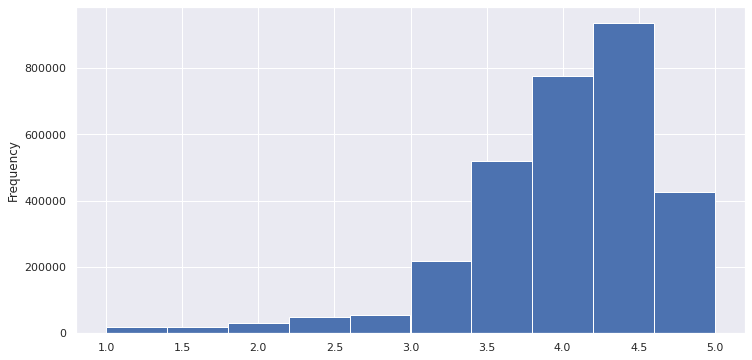

In [31]:
top_rated.score.plot(kind='hist',figsize=(12,6))

In [8]:
top_beers = top_rated.beer_id.unique()

In [18]:
top_beer_df = beers_df[beers_df.id.isin(top_beers)]
top_beer_df

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
126,81010,Gose,24134,SC,US,Leipzig Gose,Rotating,4.0,This is our interpretation of Gose (pronounced...,f
217,34094,Older Viscosity,13839,CA,US,American Imperial Stout,Rotating,12.0,Imperial Stout aged for 12 months in new bourb...,f
614,34164,Rye Of The Tiger IPA,73,OH,US,American IPA,Rotating,7.5,No notes at this time.,f
970,53187,Bodhi,341,OH,US,American Imperial IPA,Rotating,8.5,An awakening of the senses by virtue of Americ...,f
1138,3280,Schneider Weisse Tap 7 Unser Original,72,NaN,DE,German Hefeweizen,Year-round,5.4,Formerly Schneider Weisse Original.,f
...,...,...,...,...,...,...,...,...,...,...
350611,102340,Pirate Bomb!,30356,OK,US,American Imperial Stout,Rotating,15.0,Pirate bomb is our beer Prairie Bomb! aged in ...,f
352081,178740,Pineapple Sculpin,199,CA,US,American IPA,Year-round,7.0,Our Pineapple Sculpin IPA came from one of man...,f
353214,108525,Easy Jack Session IPA,2210,CA,US,American IPA,Year-round,4.5,Formerly Easy Jack Summer Session IPA,f
354035,138289,Big Lushious,1199,MI,US,American Imperial Stout,Limited (brewed once),7.8,"Big Lushious is a deep, rich stout that’s pack...",t


In [21]:
top_beer_df[top_beer_df.notes=='No notes at this time.']

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
614,34164,Rye Of The Tiger IPA,73,OH,US,American IPA,Rotating,7.5,No notes at this time.,f
9140,2264,Brown Shugga',220,CA,US,American Strong Ale,Winter,10.0,No notes at this time.,f
9829,73,Young's Double Chocolate Stout,664,GB2,GB,English Sweet / Milk Stout,Year-round,5.2,No notes at this time.,f
9841,87,Pale Ale,147,CA,US,American Pale Ale (APA),Year-round,5.4,No notes at this time.,t
10047,50509,Double Double Barrel Ale,2210,CA,US,British Barleywine,Rotating,12.0,No notes at this time.,f
...,...,...,...,...,...,...,...,...,...,...
329808,68942,Chainbreaker White IPA,63,OR,US,Belgian IPA,Year-round,5.5,No notes at this time.,f
334560,78551,Old Guardian Barley Wine Style Ale (2012),147,CA,US,American Barleywine,Winter,11.0,No notes at this time.,f
338621,88404,Invasion Pale Ale,17981,FL,US,American Pale Ale (APA),Rotating,5.0,No notes at this time.,f
342484,92448,Espresso Imperial Russian Stout,147,CA,US,Russian Imperial Stout,Limited (brewed once),11.0,No notes at this time.,t


In [22]:
top_beer_df[top_beer_df.retired=='t']

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
9841,87,Pale Ale,147,CA,US,American Pale Ale (APA),Year-round,5.40,No notes at this time.,t
14936,63224,Blue Moon Winter Abbey Ale,306,CO,US,Belgian Dubbel,Winter,5.60,No notes at this time.,t
16296,204,Old Scratch Amber Lager,68,MD,US,American Amber / Red Lager,Year-round,5.50,No notes at this time.,t
18809,22387,Imperial Red Ale,220,CA,US,American Imperial Red Ale,Rotating,7.80,54.2 IBU,t
19239,15619,The Beast Grand Cru,30,CO,US,Belgian Strong Dark Ale,Summer,16.83,"Hop Variety: Bravo, Bullion, Sterling, Hersbru...",t
...,...,...,...,...,...,...,...,...,...,...
329444,65325,Tramp Stamp,22951,MA,US,Belgian IPA,Year-round,7.00,No notes at this time.,t
342484,92448,Espresso Imperial Russian Stout,147,CA,US,Russian Imperial Stout,Limited (brewed once),11.00,No notes at this time.,t
342809,131782,Vanilla Rye Bourbon County Brand Stout,1146,IL,US,American Imperial Stout,Rotating,13.60,First brewed for the legendary festival of Woo...,t
343667,102123,Proprietor's Bourbon County Brand Stout (2013),1146,IL,US,American Imperial Stout,Limited (brewed once),14.10,Proprietor’s Bourbon County Brand Stout is mea...,t


In [33]:
styles = top_beer_df['style'].unique()
styles

array(['Leipzig Gose', 'American Imperial Stout', 'American IPA',
       'American Imperial IPA', 'German Hefeweizen', 'American Porter',
       'Belgian Saison', 'American Pale Ale (APA)', 'American Strong Ale',
       'American Lager', 'American Amber / Red Ale', 'New England IPA',
       'Pumpkin Beer', 'Russian Imperial Stout', 'Belgian Witbier',
       'Vienna Lager', 'English Brown Ale', 'Fruit and Field Beer',
       'Belgian Dubbel', 'Belgian Strong Dark Ale', 'Belgian Tripel',
       'California Common / Steam Beer', 'American Adjunct Lager',
       'English Sweet / Milk Stout', 'Smoke Porter', 'British Barleywine',
       'German Märzen / Oktoberfest', 'German Doppelbock', 'German Bock',
       'American Pale Wheat Ale', 'Belgian Pale Ale',
       'American Amber / Red Lager', 'English Pale Ale',
       'American Brown Ale', 'English India Pale Ale (IPA)',
       'Belgian Strong Pale Ale', 'Belgian IPA', 'American Stout',
       'English Strong Ale',
       'English Extra Spe

<AxesSubplot:xlabel='style'>

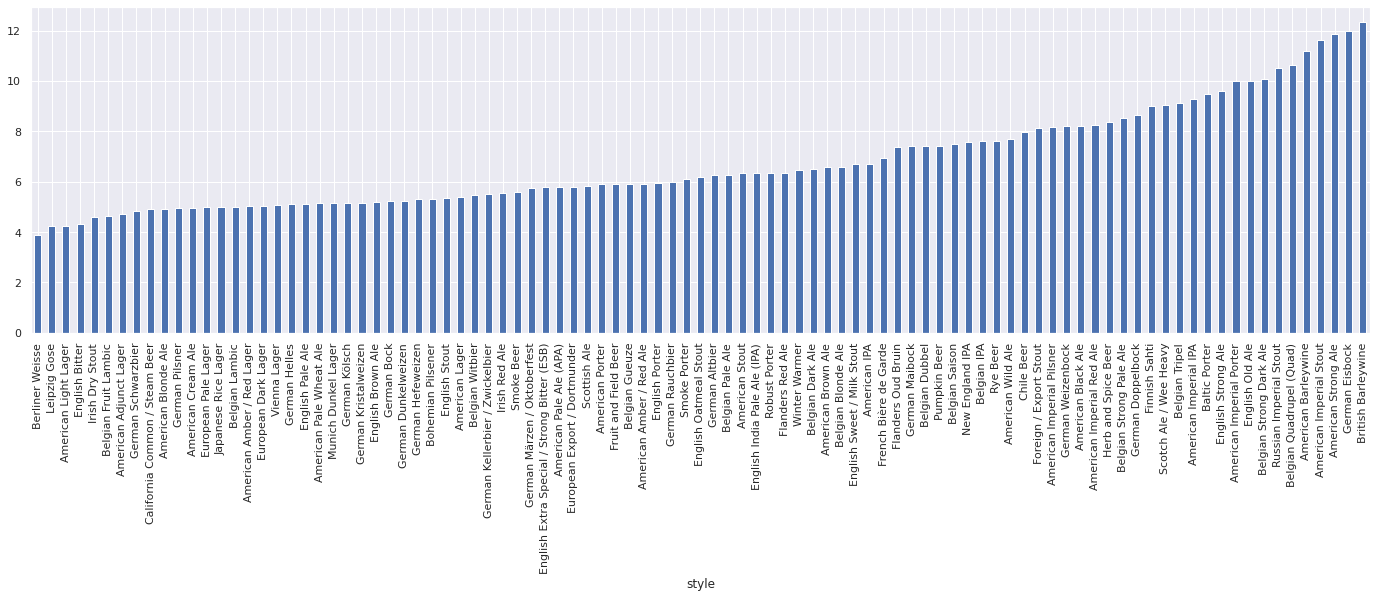

In [41]:
top_beer_df.groupby('style').mean().sort_values('abv').abv.plot(kind='bar',figsize=(24,6))

In [42]:
reviews_df = top_rated.merge(beers_df, how = 'left',left_on='beer_id', right_on='id')
rewviews_df

,Unnamed: 0,beer_id,username,score,count,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,0,125646,_dirty_,4.50,2664,125646,Haze,28743,MA,US,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f
1,1,125646,CJDUBYA,4.75,2664,125646,Haze,28743,MA,US,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f
2,2,125646,GratefulBeerGuy,NaN,2664,125646,Haze,28743,MA,US,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f
3,3,125646,LukeGude,4.31,2664,125646,Haze,28743,MA,US,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f
4,4,125646,jneff33,4.91,2664,125646,Haze,28743,MA,US,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078482,3077585,57285,Agold,2.31,1979,57285,Guinness Black Lager,209,NaN,IE,European Dark Lager,Rotating,4.5,No notes at this time.,f
3078483,3077586,57285,trbergman,3.26,1979,57285,Guinness Black Lager,209,NaN,IE,European Dark Lager,Rotating,4.5,No notes at this time.,f
3078484,3077611,57285,JohnfromDublin,2.50,1979,57285,Guinness Black Lager,209,NaN,IE,European Dark Lager,Rotating,4.5,No notes at this time.,f
3078485,3077612,57285,StJamesGate,3.25,1979,57285,Guinness Black Lager,209,NaN,IE,European Dark Lager,Rotating,4.5,No notes at this time.,f


In [43]:
df.drop('retired',axis=1,inplace=True)
df.drop('availability',axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)
df.drop('count',axis=1,inplace=True)

In [46]:
styles_df = df.groupby('style').mean()
styles_df

,Unnamed: 0,beer_id,score,brewery_id,abv
style,,,,,
American Adjunct Lager,1.034402e+06,2203.741020,2.579494,739.736579,4.714503
American Amber / Red Ale,1.242809e+06,14173.568672,3.824334,2129.469378,5.774665
American Amber / Red Lager,9.191893e+05,988.956813,3.401975,232.436823,4.893783
American Barleywine,1.850514e+06,15716.746654,4.126529,245.141763,11.015279
American Black Ale,1.624214e+06,70894.578622,4.061759,2046.267161,8.310040
...,...,...,...,...,...
Scottish Ale,1.637462e+06,10319.049165,3.797453,1900.261968,5.889687
Smoke Beer,6.227380e+05,72720.000000,2.800589,132.000000,5.600000
Smoke Porter,7.805286e+05,10959.853526,4.002000,215.038613,6.044763


<AxesSubplot:xlabel='style'>

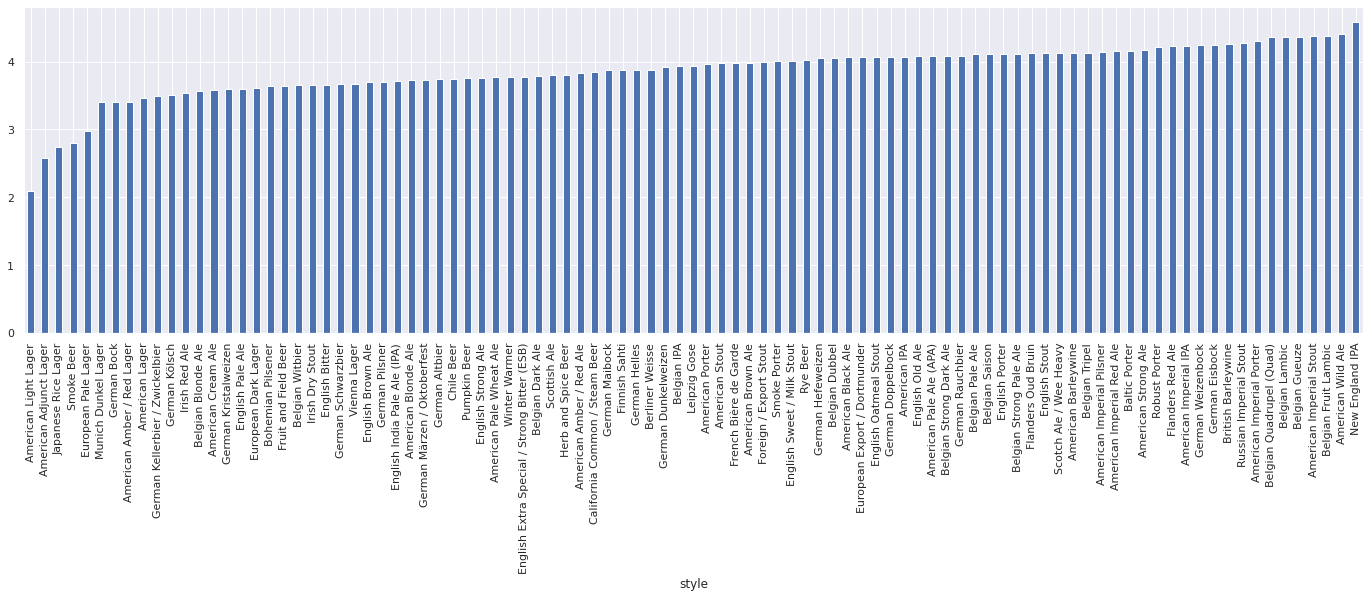

In [48]:
styles_df.sort_values('score').score.plot(kind='bar',figsize=(24,6))